In [1]:
%matplotlib inline                                                             
import matplotlib as mpl                                                      #packages imported
import matplotlib.pyplot as plt
import random
import math

In [2]:
def spheref(x,y):                                                             #sphere function for distance
    d = float(x**2+y**2)
    return d

In [3]:
def light(d):                                                                 #light intensity function
    if (d==0):
        l=999
    else:    
        l=1/d
    return l

In [4]:
def roulette_wheel(total):                                                    #roulette wheel function
    global c
    leader=-1
    r = random.uniform(0,1)
    for n in range(c):
        if r<total[n]:
            leader=n
            break
    return leader 

In [5]:
def probability_func(values,prob):                                           #probability (max) func
    global c
    for j in range(c):
        prob.append(values[j]/sum(values))
    return prob    

In [6]:
def slope(x1, y1, x2, y2):                                                   #slope function
    if(x1==x2):
        t=math.pi
    else:    
        m = (float)(y2-y1)/(x2-x1)
        t = math.atan(m)
    return(t)

In [7]:
def generate_obs():                                                          #creating obstacles
    global l,b,rectangle
    
    rectangle.append([-l,-b,2*l,b])
    rectangle.append([-l,-b,l,2*b])
    for i in range(0,10):
        xr=random.uniform(0,l)
        yr=random.uniform(0,b)
        wr=random.uniform(0.5,1)
        hr=random.uniform(0.5,1)
        rectangle.append([xr,yr,wr,hr])
        

In [8]:
def checkarea(xc,yc):                                                        #checking position of point wrt obstacle
    global rectangle
    flag=True
    for j in rectangle:
        if (xc>j[0]) and (xc<(j[0]+j[2])) and (yc>j[1]) and (yc<(j[1]+j[3])):
            flag=False
            print("Hey Obstacle!")            
            break
    return flag,j                                                            #false if obstacle hit, j=rectangle sublist
        

In [9]:
def new_path(newx,newy,j):                                                   #put candidate on obstacle edge
    d1=j[1]+j[3]-newy
    d2=j[0]+j[2]-newx
    d3=newy-j[1]
    d4=newx-j[0]
    m=min(d1,d2,d3,d4)
    if(m==d1):
        (px,py)=(newx,newy+d1)
    elif(m==d2):
        (px,py)=(newx+d2,newy)
    elif(m==d3):
        (px,py)=(newx,newy-d3)
    elif(m==d4):
        (px,py)=(newx-d4,newy)
    
    print("edge pt=",px,py)
    return px,py

In [10]:
def position(new_input,n,m,i):                                              #loop & multi check
    global rectangle
    flag,j=checkarea(n,m)
    while(flag==False and (math.sqrt(spheref(n,m)))>0.1):
        k,l=new_path(n,m,j)
        flag,j=checkarea(k,l)
        (n,m)=(k,l)
    new_input[i].append(n)
    new_input[i].append(m)
    return(new_input)

In [11]:
def new_inputf(new_input,matrix,c_follow):                                  #new matrix acc to following list
    m=t=0
    global c,step
    for i in range(c):
        xn=matrix[i][0]
        yn=matrix[i][1]
        xf=matrix[c_follow[i]][0]
        yf=matrix[c_follow[i]][1]
        
        if (c_follow[i]==i):                                                #if candidate follows itself                                              
            t=random.uniform(0,2*math.pi)
            cos=abs(math.cos(t))*step
            sin=abs(math.sin(t))*step
            a=xn-cos
            b=yn-sin
            position(new_input,a,b,i)
                     
        else:                                                               #following other candidate
            t=slope(xn,yn,xf,yf)
            cos=abs(math.cos(t))*step
            sin=abs(math.sin(t))*step
            ci=xn+cos
            di=yn+sin
            ei=xn-cos
            fi=yn-sin
            if (xn<=xf and yn<=yf):
                position(new_input,ci,di,i)
                
            elif (xn>=xf and yn>=yf):
                position(new_input,ei,fi,i)
                
            elif (xn>=xf and yn<=yf):
                position(new_input,ei,di,i)
               
            elif (xn<=xf and yn>=yf):
                position(new_input,ci,fi,i)

    return new_input

In [12]:
def main_func(matrix,n):  
    global frange,l,b,c,step,x,y,rectangle              
   
    for i in range(c):                                                          #storing values for plotting
        x[i].append(matrix[i][0])
        y[i].append(matrix[i][1])
        
    distance_sq=[]                                                              #calculating distance from light source
    distance=[]
    for i in range(c):
        distance_sq.append(float(spheref(matrix[i][0],matrix[i][1])))
        distance.append(float(math.sqrt(distance_sq[i])))
    #print("Distance from light source: ", distance)
    
    light_int=[]
    for j in range(c):
        light_int.append(float(light(distance_sq[j])))                          #calculating light intensity
    #print("Light intensity: ",light_int)
    
    prob=[]
    probability_func(light_int,prob)                                            #calculating probability
    #print("Probabilities: ",prob)
    
    total=[]                                                                    #creating the roulette scale
    for i in range(c):
        total.append(sum(prob[0:i+1]))
    #print("Roulette Wheel: ",total)
    
    c_follow=[]                                                                 #determining who follows whom
    for i in range(c):
        c_follow.append(int(roulette_wheel(total)))
    print("Following: ",c_follow)
    
    new_input=[[] for _ in range(c)]                                            #new positions of candidates
    new_inputf(new_input,matrix,c_follow)
    #print("Next Learning attempt: ",new_input)
    
    print("Learning attempt no= ",n)
    n=n+1
    if n==100:
        step=0.5*step                                                           #halving step after 100th iteration
    if all(val<0.1 for val in distance):
        return(x,y)
    else:
        main_func(new_input,n)                                                  #recursive function

In [13]:
c=int(input("Enter number of candidates:"))                                     #taking input 
l=float(input("Enter length of arena:"))
b=float(input("Enter breadth of arena:"))

step=float(math.sqrt(l**2+b**2)/100)                                            #step=diagonal/100

print("Step=",step)

rectangle=[]
generate_obs()                                                                  #creating obstacles
print("Obstacle coordinates:",rectangle)

matrix=[[] for _ in range(c)]                                                   #matrix to store values of x,y
cnt=0

while cnt<c:                                                                    #random initial positions of candidates
    xc=random.uniform(0,l)
    yc=random.uniform(0,b)
    flag,j=checkarea(xc,yc)
    if (flag):
        matrix[cnt].append(xc)
        matrix[cnt].append(yc)
        cnt=cnt+1
    
print("Start positions: ",matrix)

Enter number of candidates:5
Enter length of arena:5
Enter breadth of arena:5
Step= 0.07071067811865475
Obstacle coordinates: [[-5.0, -5.0, 10.0, 5.0], [-5.0, -5.0, 5.0, 10.0], [0.5558226482859685, 1.1207593281262334, 0.6209147638037604, 0.8074459253527837], [0.326758791590141, 0.08107985755505087, 0.5846188395471299, 0.7973957099011107], [2.363160283243836, 2.540807074504612, 0.678413171190895, 0.8118074989180237], [0.11242420402963582, 1.613045728217044, 0.8914390937971027, 0.5653683345717417], [0.02798565467177383, 3.5778221759540108, 0.8275960681948084, 0.5917511503609585], [3.720552665389725, 4.696591137710299, 0.7696933601148397, 0.7137498997578157], [1.3332769361404724, 3.4860417240999677, 0.5336736515100402, 0.9971128975892218], [0.8579439149400025, 1.1723384515998942, 0.9488315905732618, 0.6389583188835888], [2.113967728757414, 1.4010703321341973, 0.767306165088486, 0.9321280163399792], [1.4110181752197053, 4.629478469708024, 0.5894911275388157, 0.8189547813655021]]
Hey Obstac

In [14]:
x=[[] for _ in range(c)]
y=[[] for _ in range(c)]
main_func(matrix,1)

Following:  [3, 4, 0, 2, 0]
Learning attempt no=  1
Following:  [0, 4, 1, 3, 0]
Learning attempt no=  2
Following:  [2, 3, 2, 3, 4]
Learning attempt no=  3
Following:  [3, 3, 1, 0, 4]
Learning attempt no=  4
Following:  [0, 2, 3, 3, 4]
Learning attempt no=  5
Following:  [3, 0, 0, 3, 0]
Learning attempt no=  6
Following:  [0, 0, 4, 0, 3]
Learning attempt no=  7
Following:  [3, 2, 0, 3, 4]
Learning attempt no=  8
Following:  [2, 4, 0, 2, 2]
Learning attempt no=  9
Following:  [3, 2, 3, 0, 0]
Learning attempt no=  10
Following:  [0, 2, 3, 3, 2]
Learning attempt no=  11
Following:  [0, 3, 0, 0, 0]
Learning attempt no=  12
Following:  [3, 3, 0, 3, 0]
Learning attempt no=  13
Following:  [4, 4, 2, 4, 1]
Learning attempt no=  14
Following:  [2, 3, 2, 3, 2]
Learning attempt no=  15
Following:  [3, 3, 4, 0, 0]
Learning attempt no=  16
Following:  [1, 2, 3, 2, 0]
Learning attempt no=  17
Following:  [0, 0, 0, 0, 4]
Learning attempt no=  18
Following:  [2, 0, 0, 1, 1]
Learning attempt no=  19
Fo

Following:  [0, 4, 2, 3, 3]
Learning attempt no=  125
Following:  [0, 3, 2, 1, 2]
Learning attempt no=  126
Following:  [0, 4, 1, 1, 4]
Learning attempt no=  127
Following:  [2, 2, 1, 1, 4]
Learning attempt no=  128
Following:  [4, 0, 1, 2, 1]
Learning attempt no=  129
Following:  [4, 0, 1, 1, 0]
Learning attempt no=  130
Following:  [2, 0, 2, 0, 1]
Learning attempt no=  131
Following:  [0, 1, 2, 4, 4]
Learning attempt no=  132
Following:  [4, 0, 0, 0, 0]
Learning attempt no=  133
Following:  [2, 2, 3, 4, 3]
Learning attempt no=  134
Following:  [3, 4, 2, 0, 4]
Learning attempt no=  135
Following:  [4, 4, 3, 4, 3]
Learning attempt no=  136
Following:  [4, 4, 3, 4, 1]
Learning attempt no=  137
Following:  [2, 2, 2, 2, 3]
Learning attempt no=  138
Following:  [4, 4, 1, 0, 2]
Learning attempt no=  139
Following:  [4, 0, 0, 2, 1]
Learning attempt no=  140
Following:  [3, 1, 1, 0, 4]
Learning attempt no=  141
Following:  [1, 3, 0, 1, 4]
Learning attempt no=  142
Following:  [1, 1, 1, 4, 0]


Following:  [2, 4, 2, 4, 3]
Hey Obstacle!
edge pt= 0.8580179637164658 0.0
Learning attempt no=  280
Following:  [1, 4, 0, 1, 1]
Learning attempt no=  281
Following:  [3, 2, 0, 2, 4]
Learning attempt no=  282
Following:  [0, 4, 0, 3, 0]
Hey Obstacle!
edge pt= 0.8608429636234426 0.0
Learning attempt no=  283
Following:  [3, 1, 0, 3, 1]
Hey Obstacle!
edge pt= 0.8362847954228873 0.0
Hey Obstacle!
edge pt= 0.8516889440093156 0.0
Learning attempt no=  284
Following:  [0, 1, 2, 3, 1]
Hey Obstacle!
edge pt= 0.8700621000782062 0.0
Hey Obstacle!
edge pt= 0.8070907621129787 0.0
Hey Obstacle!
edge pt= 0.8420000415944638 0.0
Hey Obstacle!
edge pt= 0.8417863333638125 0.0
Hey Obstacle!
edge pt= 0.8331356569434902 0.0
Learning attempt no=  285
Following:  [0, 1, 1, 4, 3]
Hey Obstacle!
edge pt= 0.8529050074781235 0.0
Hey Obstacle!
edge pt= 0.7767730957333628 0.0
Learning attempt no=  286
Following:  [1, 2, 1, 4, 2]
Learning attempt no=  287
Following:  [4, 2, 1, 1, 2]
Learning attempt no=  288
Followin

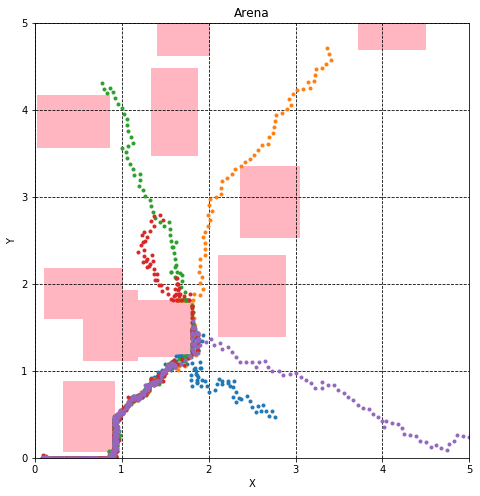

In [15]:
fig,ax=plt.subplots(figsize=(8, 8))
for p in range(c):
    ax.plot(x[p],y[p],".",linewidth=2,)
    
ax.set_title("Arena")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim((0,l))
ax.set_ylim((0,b))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', color='k', linestyle='--')

for q in rectangle:
    patch=plt.Rectangle((q[0],q[1]),q[2],q[3],color='lightpink')
    ax.add_patch(patch)

plt.show()

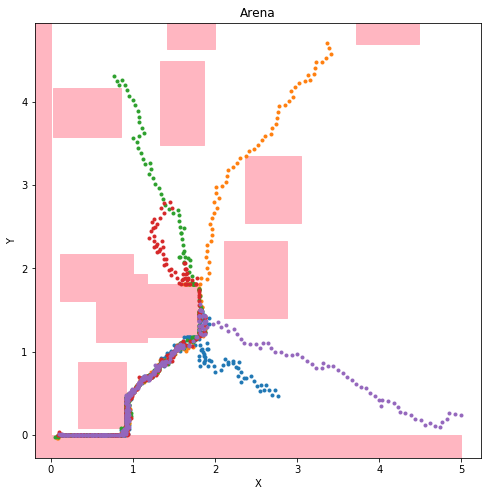

In [16]:
fig,ax=plt.subplots(figsize=(8, 8))
for p in range(c):
    ax.plot(x[p],y[p],".",linewidth=2,)
for q in rectangle:
    pat=plt.Rectangle((q[0],q[1]),q[2],q[3],color='lightpink')
    ax.add_patch(pat)    
ax.set_title("Arena")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()